前几行数据：
   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00   
1             3          9          6  

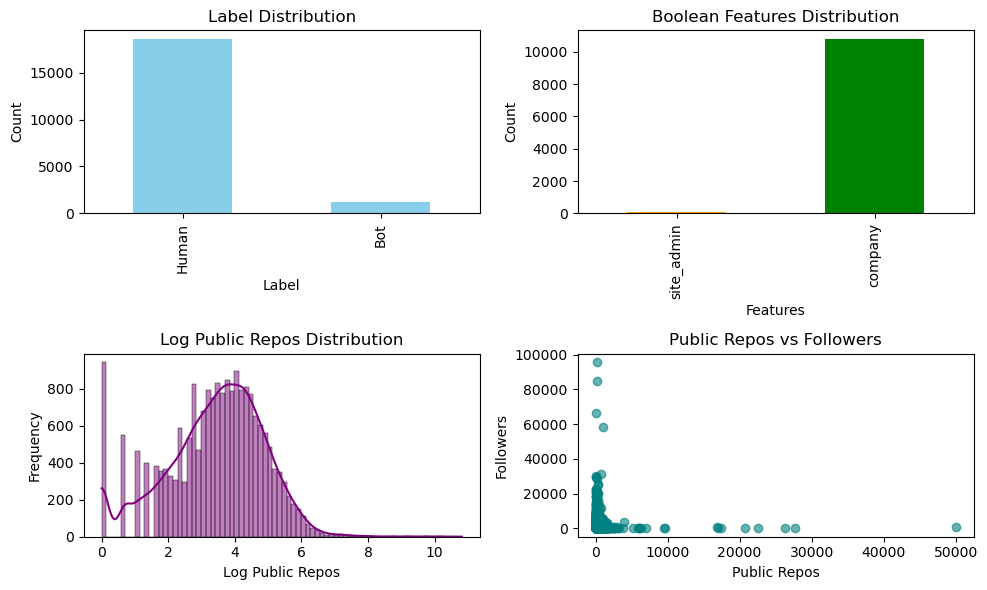

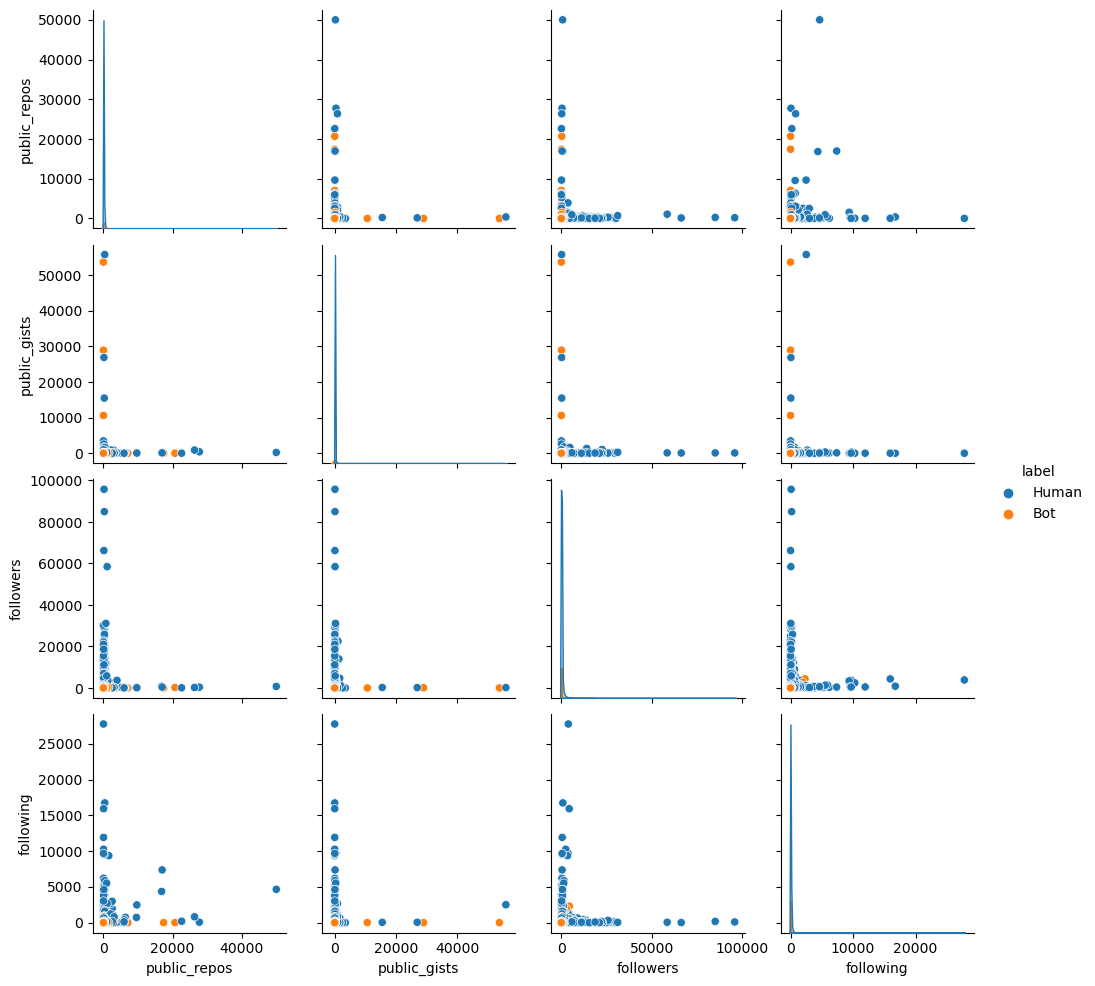

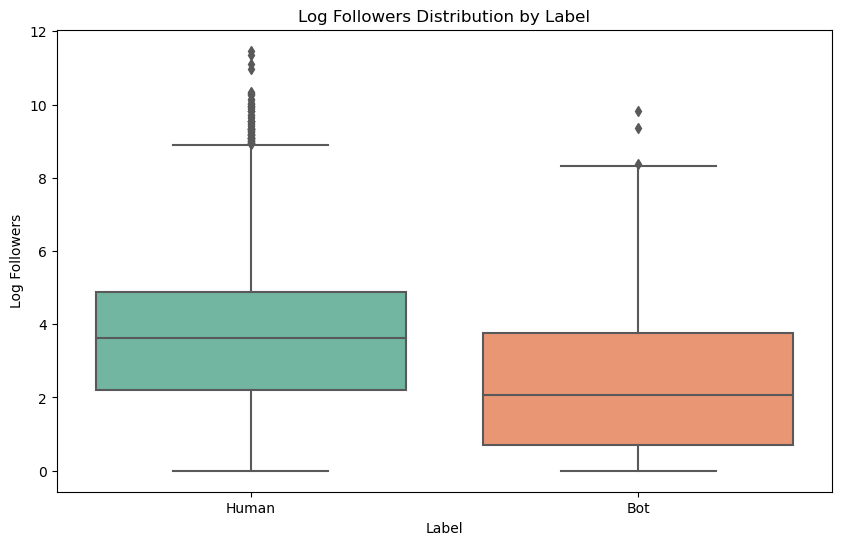

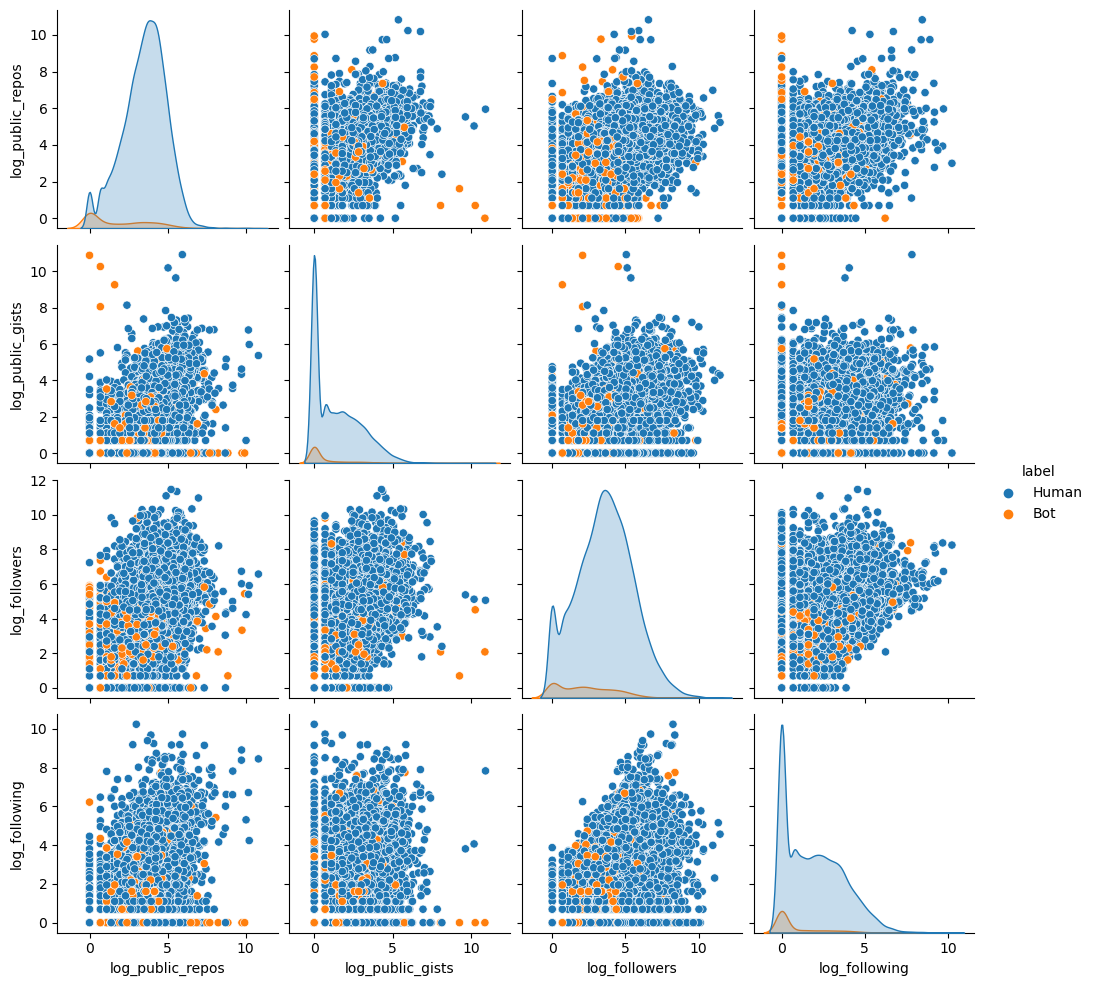

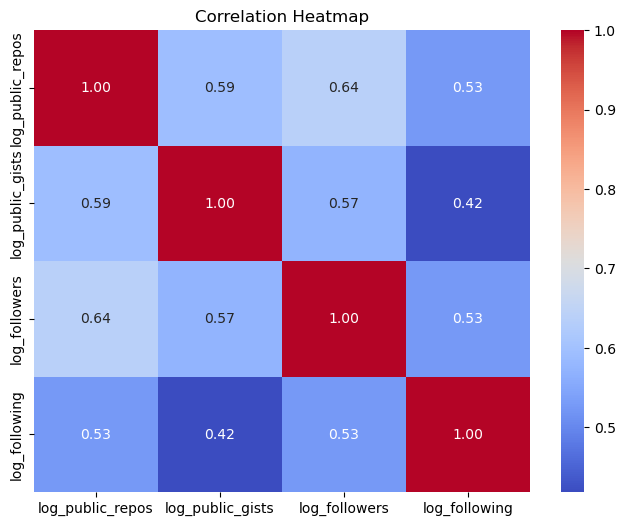

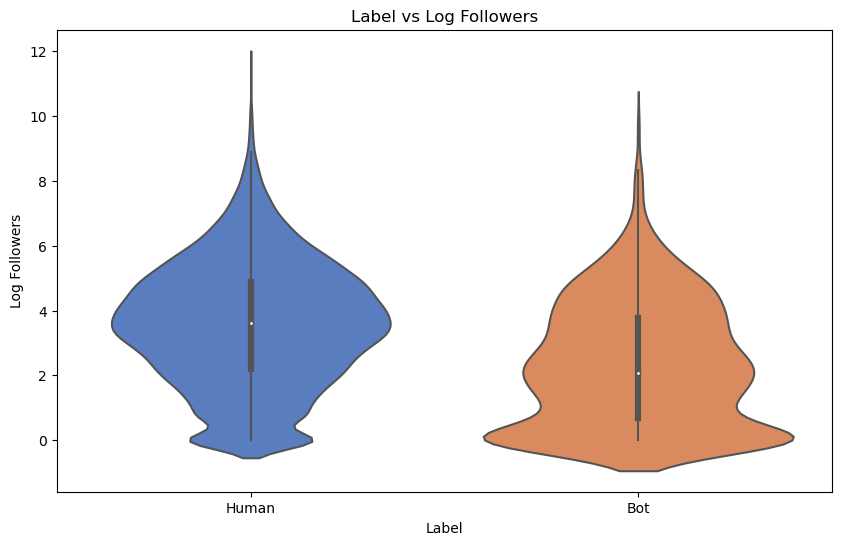

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

# 读取数据
file_path = r"C:\Users\Lenovo\Desktop\数据导论\github_bot_processed_data.csv"
data = pd.read_csv(file_path)

# 设置显示选项
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 20)

# 查看数据
print("前几行数据：")
print(data.head())
print("\n数据基本信息：")
print(data.info())

# 描述性统计
print("\n描述性统计信息：")
print(data.describe())

# 格式化数据展示
data['created_at'] = pd.to_datetime(data['created_at'], errors='coerce')  # 日期格式
data['updated_at'] = pd.to_datetime(data['updated_at'], errors='coerce')  # 日期格式
data['log_followers'] = data['followers'].apply(lambda x: f"{x:,.2f}")  # 格式化为货币格式
print("\n格式化后的数据：")
print(data[['created_at', 'updated_at', 'log_followers']].head())

# 对数变换
columns_to_transform = ['public_repos', 'public_gists', 'followers', 'following']
for col in columns_to_transform:
    data[f'log_{col}'] = np.log1p(data[col])  # log1p: log(1 + x) 避免 log(0) 问题

print("\n对数变换后的列：")
print(data[[f'log_{col}' for col in columns_to_transform]].head())

# 绘制图表
plt.figure(figsize=(10, 6))

# 条形图：展示 label 列的类别分布
plt.subplot(2, 2, 1)
data['label'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')

# 堆积柱状图：多个布尔特征的分布
plt.subplot(2, 2, 2)
bool_features = ['site_admin', 'company']  # 假设这些是布尔特征
data[bool_features].astype(int).sum().plot(kind='bar', stacked=True, color=['orange', 'green'])
plt.title('Boolean Features Distribution')
plt.xlabel('Features')
plt.ylabel('Count')

# 直方图：展示 log_public_repos 的分布
plt.subplot(2, 2, 3)
sns.histplot(data['log_public_repos'], kde=True, color='purple')
plt.title('Log Public Repos Distribution')
plt.xlabel('Log Public Repos')
plt.ylabel('Frequency')

# 散点图：展示 public_repos 与 followers 的关系
plt.subplot(2, 2, 4)
plt.scatter(data['public_repos'], data['followers'], alpha=0.6, color='teal')
plt.title('Public Repos vs Followers')
plt.xlabel('Public Repos')
plt.ylabel('Followers')

plt.tight_layout()
plt.show()

# 散点矩阵：展示数值特征的成对关系
sns.pairplot(data[columns_to_transform + ['label']], hue='label')
plt.show()

# Seaborn 图表

# 箱线图：不同 label 下 log_followers 的分布
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='log_followers', data=data, palette='Set2')
plt.title('Log Followers Distribution by Label')
plt.xlabel('Label')
plt.ylabel('Log Followers')
plt.show()

# 成对图：展示特征间关系并按 label 分类
sns.pairplot(data[[f'log_{col}' for col in columns_to_transform] + ['label']], hue='label')
plt.show()

# 热图：特征间相关性
plt.figure(figsize=(8, 6))
correlation_matrix = data[[f'log_{col}' for col in columns_to_transform]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 小提琴图：展示 label 与 log_followers 的分布差异
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='log_followers', data=data, palette='muted')
plt.title('Label vs Log Followers')
plt.xlabel('Label')
plt.ylabel('Log Followers')
plt.show()

# 生成 Pandas Profiling 报告
profile = ProfileReport(data, title="GitHub Bot Processed Data Report", explorative=True)
profile.to_file("github_bot_processed_data_report.html")
